#A preparation step

In [ ]:
!pip install tensorflow hub


     |████████████████████████████████| 210 kB 5.0 MB/s 
     |████████████████████████████████| 1.8 MB 48.7 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 545 kB 67.5 MB/s 
     |████████████████████████████████| 81 kB 11.9 MB/s 
     |████████████████████████████████| 152 kB 93.4 MB/s 
     |████████████████████████████████| 131 kB 89.0 MB/s 
     |████████████████████████████████| 80 kB 11.3 MB/s 
     |████████████████████████████████| 3.0 MB 30.1 MB/s 
     |████████████████████████████████| 105 kB 69.2 MB/s 
     |████████████████████████████████| 5.8 MB 17.1 MB/s 
     |████████████████████████████████| 256 kB 73.2 MB/s 
     |████████████████████████████████| 95 kB 6.8 MB/s 
     |████████████████████████████████| 75 kB 5.9 MB/s 
     |████████████████████████████████| 8.2 MB 21.1 MB/s 
     |████████████████████████████████| 79 kB 9.9 MB/s 
     |████████████████████████████████| 127 kB 74.0 MB/s 
     |███████████████████

*use your pretrained model* 

link: https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4

this txt file shows the classes of that model 

In [15]:
!wget https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt

--2021-11-22 13:08:56--  https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 142.250.141.128, 2607:f8b0:4023:c03::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10484 (10K) [text/plain]
Saving to: ‘ImageNetLabels.txt’

ImageNetLabels.txt  100%[===================>]  10.24K  --.-KB/s    in 0s      

2021-11-22 13:08:56 (88.1 MB/s) - ‘ImageNetLabels.txt’ saved [10484/10484]



In [4]:
!wget https://www.burkemuseum.org/sites/default/files/images/biology/herpetology/washington/common-gartersnake1-1100x555.jpg

--2021-11-22 12:43:58--  https://www.burkemuseum.org/sites/default/files/images/biology/herpetology/washington/common-gartersnake1-1100x555.jpg
Resolving www.burkemuseum.org (www.burkemuseum.org)... 128.95.249.96
Connecting to www.burkemuseum.org (www.burkemuseum.org)|128.95.249.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162804 (159K) [image/jpeg]
Saving to: ‘common-gartersnake1-1100x555.jpg’

common-gartersnake1 100%[===================>] 158.99K  --.-KB/s    in 0.1s    

2021-11-22 12:43:59 (1.35 MB/s) - ‘common-gartersnake1-1100x555.jpg’ saved [162804/162804]



In [22]:
!pip3 install --upgrade Pillow

     |████████████████████████████████| 3.1 MB 5.1 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.3.2
    Uninstalling Pillow-8.3.2:
      Successfully uninstalled Pillow-8.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.11.1+cu111 requires torch==1.10.0, which is not installed.
fastai 1.0.61 requires torch>=1.0.0, which is not installed.
hub 2.1.0 requires pillow==8.3.2, but you have pillow 8.4.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


that was a solution for 'PIL.TiffTags' has no attribute 'IFD' that might appear 

In [1]:
import numpy as np
import cv2
from PIL import Image
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential



In [2]:
Image_size = (224,224)
model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape = Image_size+(3,))
])



resizing image as the data of the model to classify it.

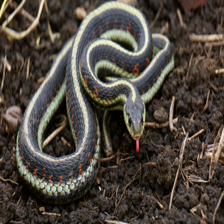

In [7]:
img = 'common-gartersnake1-1100x555.jpg'
garter_snake = Image.open(img).resize(Image_size)
garter_snake

scaling the image for better results

In [10]:
garter_snake = np.array(garter_snake)/255.0
garter_snake

array([[[2.17111066e-06, 1.62833299e-06, 1.02524670e-06],
        [1.32678985e-06, 1.08555533e-06, 5.42777665e-07],
        [7.84012182e-07, 6.03086294e-07, 1.20617259e-07],
        ...,
        [3.92006091e-06, 3.07574010e-06, 2.59327106e-06],
        [3.98036954e-06, 3.49790051e-06, 2.83450558e-06],
        [3.01543147e-06, 2.53296244e-06, 1.86956751e-06]],

       [[1.99018477e-06, 1.50771574e-06, 9.04629441e-07],
        [1.62833299e-06, 1.32678985e-06, 5.42777665e-07],
        [1.20617259e-06, 9.04629441e-07, 4.22160406e-07],
        ...,
        [3.85975228e-06, 3.13604873e-06, 2.59327106e-06],
        [3.92006091e-06, 3.43759188e-06, 2.77419695e-06],
        [2.53296244e-06, 2.11080203e-06, 1.50771574e-06]],

       [[1.74895025e-06, 1.26648122e-06, 4.82469035e-07],
        [1.80925888e-06, 1.50771574e-06, 5.42777665e-07],
        [2.59327106e-06, 2.17111066e-06, 1.02524670e-06],
        ...,
        [3.67882639e-06, 3.07574010e-06, 2.47265381e-06],
        [3.79944365e-06, 3.31

adding new dim if multi images calsification wanted

In [11]:
garter_snake = garter_snake[np.newaxis,...]
garter_snake

array([[[[2.17111066e-06, 1.62833299e-06, 1.02524670e-06],
         [1.32678985e-06, 1.08555533e-06, 5.42777665e-07],
         [7.84012182e-07, 6.03086294e-07, 1.20617259e-07],
         ...,
         [3.92006091e-06, 3.07574010e-06, 2.59327106e-06],
         [3.98036954e-06, 3.49790051e-06, 2.83450558e-06],
         [3.01543147e-06, 2.53296244e-06, 1.86956751e-06]],

        [[1.99018477e-06, 1.50771574e-06, 9.04629441e-07],
         [1.62833299e-06, 1.32678985e-06, 5.42777665e-07],
         [1.20617259e-06, 9.04629441e-07, 4.22160406e-07],
         ...,
         [3.85975228e-06, 3.13604873e-06, 2.59327106e-06],
         [3.92006091e-06, 3.43759188e-06, 2.77419695e-06],
         [2.53296244e-06, 2.11080203e-06, 1.50771574e-06]],

        [[1.74895025e-06, 1.26648122e-06, 4.82469035e-07],
         [1.80925888e-06, 1.50771574e-06, 5.42777665e-07],
         [2.59327106e-06, 2.17111066e-06, 1.02524670e-06],
         ...,
         [3.67882639e-06, 3.07574010e-06, 2.47265381e-06],
         [

the next code with give as a posibility for every lable in the txt file

In [13]:
result = model.predict(garter_snake)
result


array([[-0.18003158, -0.4059773 ,  0.81898737, ..., -0.895335  ,
        -1.0841832 ,  1.2913208 ]], dtype=float32)

to know which class that the image belong to (or how the model predict it), we have to choose from the result the max accuracy or score
argmax gives the index of that

In [14]:
predicted_lable_index = np.argmax(result)
predicted_lable_index

819

now I want to know the name of the class that its index is 819

In [28]:
labels = []
with open("ImageNetLabels.txt" ,"r") as file:

  labels = file.read().splitlines()
labels[:10]

['background',
 'tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen']

In [29]:
labels[predicted_lable_index]

'spotlight'

it is obvious that the model got it wrong because that was a garter snake... its index was 

In [30]:
labels.index('garter snake')

58